## Dust depostion

Tasks for tomorrow:
* Calculate the correlation between total depostion and the different atmospheric indecies.
* Plot source contribution timeseries for each of the source region at every receptor.

In [26]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
from cycler import cycler
%matplotlib inline

### 2 micron

In [18]:
def latex_plot():
    plt.rcParams.update({'figure.autolayout': True})
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.linewidth'] = 2

    # --- Use latex-style on text in plots
    plt.rcParams['text.usetex'] = False

    # --- Custumize the length of the labels
    plt.rcParams["legend.labelspacing"] = 0.2
    plt.rcParams["legend.handlelength"] = 1.0
    plt.rcParams["legend.borderaxespad"] = 0.01

    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    
    # --- Ignore warnings for generated plot
    plt.rcParams.update({'figure.max_open_warning': 0})

    plt.linewidth=17.0
    font_size_plot = 20

    return font_size_plot

def format_plot(ax, n=5):
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_locator(  AutoMinorLocator(n))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(n))


def plot_depostion_timeseries(ax, ems_dir):
    default_cycler = (cycler(color=['tab:blue', 'tab:orange', 'tab:purple', 'tab:pink','tab:brown','tab:cyan']))
    
    plt.rc('lines', linewidth=4)
    plt.rc('axes', prop_cycle=default_cycler)
    for key, ds in ems_dir.items():
        ax.plot(ds.year,ds, label=key, linestyle='dashdot', linewidth=2)
    ax.set_ylabel('Depostion rate (g/m^2 s)')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.set_xticks([2000,2005,2010,2015,2020])
    ax.legend()
latex_plot()

20

In [3]:
depo_sacol=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.SACOL.2micron.MAM.1999-2019.nc')
depo_badoe=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.BADOE.2micron.MAM.1999-2019.nc')
depo_lingtai=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.LINGTAI.2micron.MAM.1999-2019.nc')
depo_shapotou=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.SHAPOTOU.2micron.MAM.1999-2019.nc')
depo_yinchuan=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.YINCHUAN.2micron.MAM.1999-2019.nc')

In [4]:
total_depo_dict={
    'BADOE':depo_badoe.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'SACOL':depo_sacol.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'LINGTAI':depo_lingtai.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'SHAPOTOU':depo_shapotou.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'YINCHUAN':depo_yinchuan.total_deposition.sum(dim=['lon','lat'],keep_attrs=True)
}

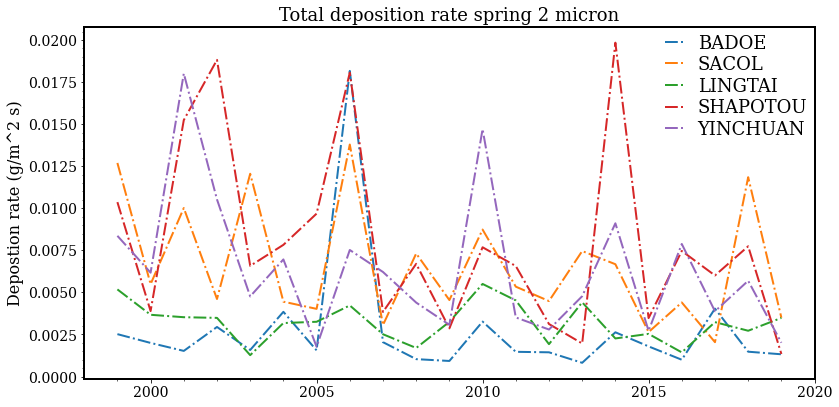

In [5]:
fig,ax = plt.subplots(figsize=(12,6))
plot_depostion_timeseries(ax, total_depo_dict)
# depo_badoe.total_deposition.sum(dim=['lon','lat'],keep_attrs=True).plot(ax=ax)
ax.set_title('Total deposition rate spring 2 micron')
plt.savefig('../figs/total_deposition_rate_spring.png',dpi=300)

In [6]:
# Spring Indecies
NAO_path_spring = '../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/nao/era5.single_level.NAO_EOF.MAM.1979-2019.nc'
APVI_path_spring = '../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/apv/era5.500hPa.APVI_index.MAM.1979-2019.nc'
EAWM_MO_path_spring = '../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/eawmi/era5.single_level.EAWM_MO.MAM.1979-2019.nc'

NAO_spring= xr.open_dataset(NAO_path_spring).sel(time=slice('1999-03-01','2019-07-01'))
APVI_spring=xr.open_dataset(APVI_path_spring).sel(time=slice('1999-03-01','2019-07-01'))
EAWM_MO_spring= xr.open_dataset(EAWM_MO_path_spring).sel(time=slice('1999-03-01','2019-07-01'))

#Winter Indecies
NAO_path_winter = '../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/nao/era5.single_level.NAO_EOF.DJF.1979-2019.nc'
APVI_path_winter = '../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/apv/era5.500hPa.APVI_index.DJF.1979-2019.nc'
EAWM_MO_path_winter = '../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/eawmi/era5.single_level.EAWM_MO.DJF.1979-2019.nc'

NAO_winter= xr.open_dataset(NAO_path_winter).sel(time=slice('1998-03-01','2019-07-01'))
APVI_winter=xr.open_dataset(APVI_path_winter).sel(time=slice('1998-03-01','2019-07-01'))
EAWM_MO_winter= xr.open_dataset(EAWM_MO_path_winter).sel(time=slice('1998-03-01','2019-07-01'))


FileNotFoundError: [Errno 2] No such file or directory: b'/mnt/acam-ns2806k/ovewh/tracing_the_winds/Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/nao/era5.single_level.NAO_EOF.MAM.1979-2019.nc'

In [8]:
indecies_spring = {'NAO_spring':NAO_spring.NAO_EOF.sel(mode=0).values,
        'APVI_spring':APVI_spring.APVI.values, 
        'EAVM_MO_spring':EAWM_MO_spring.MO.values }
indecies_winter = {'NAO_winter':NAO_winter.NAO_EOF.sel(mode=0).values,
        'APVI_winter':APVI_winter.APVI.values, 
        'EAVM_MO_winter':EAWM_MO_winter.MO.values}

In [11]:
df_depo=pd.DataFrame(total_depo_dict, index=total_depo_dict['BADOE'].year)
df_indicies_spring=pd.DataFrame(indecies_spring, index=total_depo_dict['BADOE'].year)
df_indicies_winter=pd.DataFrame(indecies_winter, index=total_depo_dict['BADOE'].year)

In [64]:
df = pd.read_csv('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/correlations_receptor/drydep/drydep.SACOL.2micron.correlations.MAM.csv', index_col=0)

In [45]:
df.index = pd.to_datetime(df.index).year

In [65]:
df

,NAO_EOF_MAM,AO_EOF_MAM,APVI_MAM,MO_MAM,EAWMI_MAM,Temp_gradient_anomalies_MAM,NAO_station_MAM,tp
taklamakan,-0.010865,0.139314,-0.431263,0.132257,-0.275835,-0.185247,0.136871,0.126205
mongolia,-0.303323,-0.367143,0.453056,0.192961,-0.092581,-0.323915,-0.369050,-0.214681
north_west,-0.120722,-0.188248,-0.059244,-0.204060,-0.230116,-0.386685,-0.151807,0.025789
total,-0.132573,-0.119966,-0.141770,-0.142603,-0.290221,-0.381609,-0.150135,-0.101827


In [9]:
df_depo.join(df_indicies_spring).corr().loc[['BADOE','SACOL','LINGTAI','SHAPOTOU','YINCHUAN'],['NAO_spring','APVI_spring','EAVM_MO_spring']]

,NAO_spring,APVI_spring,EAVM_MO_spring
BADOE,-0.211009,0.136198,0.166524
SACOL,-0.463080,-0.188490,-0.197813
LINGTAI,-0.285150,0.230764,0.475785
SHAPOTOU,-0.168838,-0.227730,-0.034990
YINCHUAN,-0.280108,-0.051801,-0.212614


All receptor locations show a negative correlation with NAO, largest negative correlation is SACOL, significant p-value 0.05, make sense since this region has the strongest influence from the desert North west of the loess plateau.  Very weak correlation with the MO spring winter monsoon index, except for Lingtai which actually has quite high correlation with EAWM, significat with a 95 % percentile. 

In [10]:
df_depo.join(df_indicies_winter).corr().loc[['BADOE','SACOL','LINGTAI','SHAPOTOU','YINCHUAN'],['NAO_winter','APVI_winter','EAVM_MO_winter']]

,NAO_winter,APVI_winter,EAVM_MO_winter
BADOE,-0.174426,0.192827,0.207042
SACOL,-0.333398,0.194654,0.196127
LINGTAI,-0.452162,-0.026675,0.306618
SHAPOTOU,-0.113002,0.248364,-0.002685
YINCHUAN,-0.380772,0.135462,-0.175396


In [11]:
import numpy as np
def test_significance(r,n):
    t= r*np.sqrt(n-2)/np.sqrt(1-r**2)

In [12]:
test_significance(0.55, 20)

### 20 micron

In [3]:
depo_sacol=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.SACOL.20micron.MAM.1999-2019.nc')
depo_badoe=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.BADOE.20micron.MAM.1999-2019.nc')
depo_lingtai=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.LINGTAI.20micron.MAM.1999-2019.nc')
depo_shapotou=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.SHAPOTOU.20micron.MAM.1999-2019.nc')
depo_yinchuan=xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/model_results/total_deposition/total_deposition.YINCHUAN.20micron.MAM.1999-2019.nc')

In [20]:
total_depo_dict={
    'BADOE':depo_badoe.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'SACOL':depo_sacol.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'LINGTAI':depo_lingtai.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'SHAPOTOU':depo_shapotou.total_deposition.sum(dim=['lon','lat'],keep_attrs=True),
    'YINCHUAN':depo_yinchuan.total_deposition.sum(dim=['lon','lat'],keep_attrs=True)
}

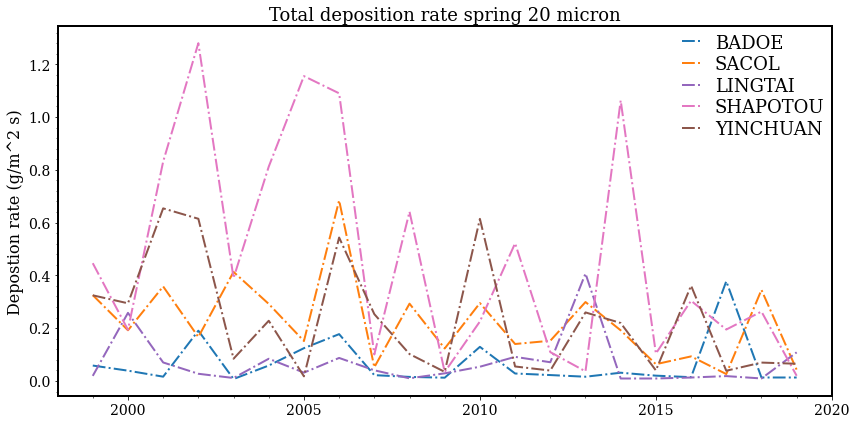

In [27]:
fig,ax = plt.subplots(figsize=(12,6))
plot_depostion_timeseries(ax, total_depo_dict)
# depo_badoe.total_deposition.sum(dim=['lon','lat'],keep_attrs=True).plot(ax=ax)
ax.set_title('Total deposition rate spring 20 micron')
plt.savefig('../figs/total_deposition_rate_spring_20.png',dpi=300)

In [11]:
from thesis_toolbox.composites.create_composites import select_years_to_composite

In [2]:
def select_years_to_composite_test(timeseries,criterion='1-std'):
    """
    DESCRIPTION:
    ===========
        Chooses which years to be included in the composites, the selection criterion can 
        either be 2, 1 or 0.5 standard devivation around the mean.
    
    USAGE:
    ======
        weak_years, strong_years = select_years_to_composite(timeseires, criterion='1-std')
    
    PARAMETERS:
    ==========
        timeseries : either xarray DataArray or pandas.series
        criterion : valid values '0.5-std', '1-std' and '2-std'
        
    """
    
    if criterion == '05-std':
        c = 0.5
    elif criterion == '1-std':
        c = 1
    elif criterion == '2-std':
        c = 2
    else:
        raise(ValueError('Invalid criterion provided: {}'.format(criterion)))
    
    std = c*timeseries.std()
    mean = timeseries.mean()
    
    if isinstance(timeseries, xr.core.dataarray.DataArray):
        if 'year' in timeseries.dims:
            strong_years =timeseries.where(timeseries > (mean+std), drop=True).year.values
            weak_years=timeseries.where(timeseries < (mean-std), drop=True).year.values
        else:
            strong_years = timeseries.where(timeseries > (mean+std), drop=True).time.dt.year.values
            weak_years = timeseries.where(timeseries < (mean-std), drop=True).time.dt.year.values
    elif isinstance(timeseries,pd.core.series.Series):
        strong_years = timeseries.where(timeseries > (mean+std)).dropna.index.year.values
        weak_years = timesereis.where(timeseries < (mean-std)).dropna.index.year.values
    else:
        raise(ValueError('Invalid datatype provided'))
    if len(weak_years) <= 3 and isinstance(timeseries, xr.core.dataarray.DataArray):
        three_weakest = timeseries.argsort()[:3].values
        weak_years = timeseries.isel(year=three_weakest).year.values
    if len(strong_years) <= 3 and isinstance(timeseries, xr.core.dataarray.DataArray):
        three_strongest = timeseries.argsort()[-3:].values
        strong_years = timeseries.isel(year=three_strongest).year.values
    return weak_years,strong_years

In [50]:
select_years_to_composite_test(total_depo_dict['LINGTAI'], '1-std')

(array([], dtype=int64), array([2000, 2013]))

In [41]:
total_depo_dict['BADOE'].isel(year=3)

<xarray.DataArray 'total_deposition' ()>
array(0.19046457, dtype=float32)
Coordinates:
    height   float32 100.0
    year     int64 2002
Attributes: (12/41)
    Conventions:            CF-1.6
    title:                  FLEXPART/FLEXDUST model output
    institution:            NILU
    source:                 Version 10.4 (2019-11-12) model output
    history:                Tue Mar 23 16:26:28 2021 resample_source_contrib ...
    references:             https://doi.org/10.5194/gmd-12-4955-2019, https:/...
    ...                     ...
    surf_only:              0
    linit_cond:             0
    relcom:                 ['BADOE', 'COARSE-SILT']
    varName:                drydep
    filename:               drydep_monthly-mean_BADOE_COARSE-SILT_199903-2019...
    long_name:              Total deposition

In [51]:
index = total_depo_dict['LINGTAI'].argsort()[-3:].values

In [52]:
index

array([20,  1, 14])

In [53]:
total_depo_dict['LINGTAI'].isel(year=index)

<xarray.DataArray 'total_deposition' (year: 3)>
array([0.10833025, 0.25797692, 0.40705797], dtype=float32)
Coordinates:
    height   float32 ...
  * year     (year) int64 2019 2000 2013
Attributes: (12/41)
    Conventions:            CF-1.6
    title:                  FLEXPART/FLEXDUST model output
    institution:            NILU
    source:                 Version 10.4 (2019-11-12) model output
    history:                Tue Mar 23 12:10:29 2021 resample_source_contrib ...
    references:             https://doi.org/10.5194/gmd-12-4955-2019, https:/...
    ...                     ...
    surf_only:              0
    linit_cond:             0
    relcom:                 ['LINGTAI', 'COARSE-SILT']
    varName:                drydep
    filename:               drydep_monthly-mean_LINGTAI_COARSE-SILT_199903-20...
    long_name:              Total deposition

In [15]:
std = depo_badoe.total_deposition.std()

In [11]:
mean = depo_badoe.total_deposition.mean()

<xarray.DataArray 'total_deposition' ()>
array(1.4955977e-05, dtype=float32)
Coordinates:
    height   float32 100.0

In [17]:
df_depo=pd.DataFrame(total_depo_dict, index=total_depo_dict['BADOE'].year)
df_indicies_spring=pd.DataFrame(indecies_spring, index=total_depo_dict['BADOE'].year)
df_indicies_winter=pd.DataFrame(indecies_winter, index=total_depo_dict['BADOE'].year)

In [18]:
df_depo.join(df_indicies_spring).corr().loc[['BADOE','SACOL','LINGTAI','SHAPOTOU','YINCHUAN'],['NAO_spring','APVI_spring','EAVM_MO_spring']]

,NAO_spring,APVI_spring,EAVM_MO_spring
BADOE,-0.203325,0.071283,0.313359
SACOL,-0.538587,-0.064761,-0.137702
LINGTAI,-0.349405,0.323398,0.285652
SHAPOTOU,-0.198974,-0.168316,-0.034276
YINCHUAN,-0.341176,0.203908,-0.218919


In [19]:
df_depo.join(df_indicies_winter).corr().loc[['BADOE','SACOL','LINGTAI','SHAPOTOU','YINCHUAN'],['NAO_winter','APVI_winter','EAVM_MO_winter']]

,NAO_winter,APVI_winter,EAVM_MO_winter
BADOE,-0.081006,-0.099321,0.064761
SACOL,-0.420417,0.183676,0.220583
LINGTAI,-0.212413,0.031919,0.168775
SHAPOTOU,-0.036104,0.162205,0.080198
YINCHUAN,-0.382677,0.184349,-0.121326


## Deposition and Source regions

In [40]:
SACOL = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SACOL.taklamakan.2micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SACOL.mongolia.2micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SACOL.north_west.2micron.MAM.1999-2019.nc')['total_deposition']
}

BADOE = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.BADOE.taklamakan.2micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.BADOE.mongolia.2micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.BADOE.north_west.2micron.MAM.1999-2019.nc')['total_deposition']
}

LINGTAI = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.LINGTAI.taklamakan.2micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.LINGTAI.mongolia.2micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.LINGTAI.north_west.2micron.MAM.1999-2019.nc')['total_deposition']
    
}
SHAPOTOU = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SHAPOTOU.taklamakan.2micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SHAPOTOU.mongolia.2micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SHAPOTOU.north_west.2micron.MAM.1999-2019.nc')['total_deposition']
}

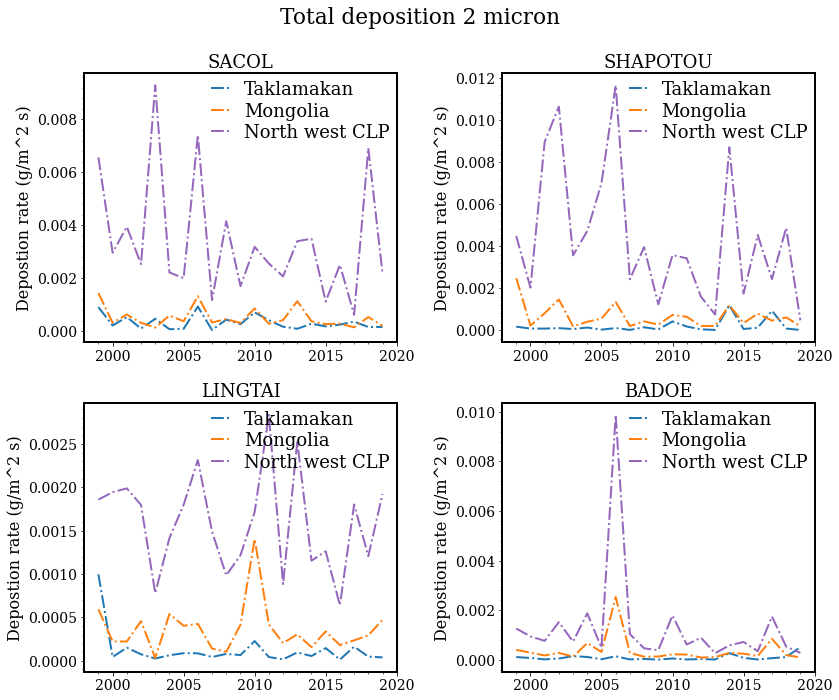

In [49]:
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(12,10))
plot_depostion_timeseries(ax[0,0],SACOL)
ax[0,0].set_title('SACOL')
plot_depostion_timeseries(ax[0,1],SHAPOTOU)
ax[0,1].set_title('SHAPOTOU')
plot_depostion_timeseries(ax[1,1],BADOE)
ax[1,1].set_title('BADOE')
plot_depostion_timeseries(ax[1,0],LINGTAI)
ax[1,0].set_title('LINGTAI')
fig.suptitle('Total deposition 2 micron')
plt.savefig('../figs/Total_deposition_2micron_sources.png',dpi=300)

## 20micron

In [50]:
SACOL = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SACOL.taklamakan.20micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SACOL.mongolia.20micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SACOL.north_west.20micron.MAM.1999-2019.nc')['total_deposition']
}

BADOE = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.BADOE.taklamakan.20micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.BADOE.mongolia.20micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.BADOE.north_west.20micron.MAM.1999-2019.nc')['total_deposition']
}

LINGTAI = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.LINGTAI.taklamakan.20micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.LINGTAI.mongolia.20micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.LINGTAI.north_west.20micron.MAM.1999-2019.nc')['total_deposition']
    
}
SHAPOTOU = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SHAPOTOU.taklamakan.20micron.MAM.1999-2019.nc')['total_deposition'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SHAPOTOU.mongolia.20micron.MAM.1999-2019.nc')['total_deposition'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/total_deposition/total_deposition.SHAPOTOU.north_west.20micron.MAM.1999-2019.nc')['total_deposition']
}

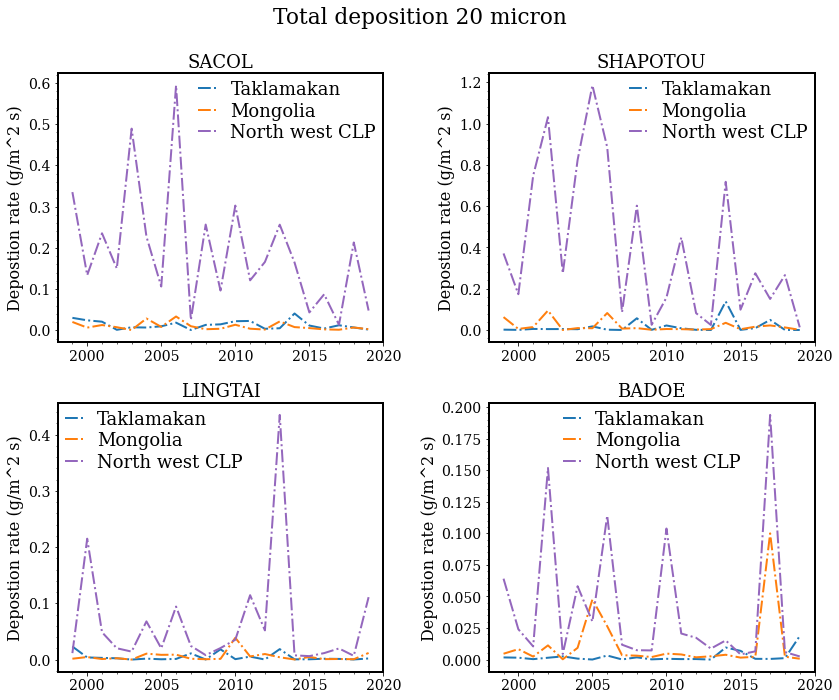

In [51]:
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(12,10))
plot_depostion_timeseries(ax[0,0],SACOL)
ax[0,0].set_title('SACOL')
plot_depostion_timeseries(ax[0,1],SHAPOTOU)
ax[0,1].set_title('SHAPOTOU')
plot_depostion_timeseries(ax[1,1],BADOE)
ax[1,1].set_title('BADOE')
plot_depostion_timeseries(ax[1,0],LINGTAI)
ax[1,0].set_title('LINGTAI')
fig.suptitle('Total deposition 20 micron')
plt.savefig('../figs/Total_deposition_20micron_sources.png',dpi=300)

### Wet deposition

In [56]:
SACOL = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.SACOL.taklamakan.2micron.MAM.1999-2019.nc')['drydep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.SACOL.mongolia.2micron.MAM.1999-2019.nc')['drydep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.SACOL.north_west.2micron.MAM.1999-2019.nc')['drydep']
}

BADOE = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.BADOE.taklamakan.2micron.MAM.1999-2019.nc')['drydep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.BADOE.mongolia.2micron.MAM.1999-2019.nc')['drydep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.BADOE.north_west.2micron.MAM.1999-2019.nc')['drydep']
}

LINGTAI = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.LINGTAI.taklamakan.2micron.MAM.1999-2019.nc')['drydep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.LINGTAI.mongolia.2micron.MAM.1999-2019.nc')['drydep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.LINGTAI.north_west.2micron.MAM.1999-2019.nc')['drydep']
    
}
SHAPOTOU = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.SHAPOTOU.taklamakan.2micron.MAM.1999-2019.nc')['drydep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.SHAPOTOU.mongolia.2micron.MAM.1999-2019.nc')['drydep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/drydep/drydep.SHAPOTOU.north_west.2micron.MAM.1999-2019.nc')['drydep']
}

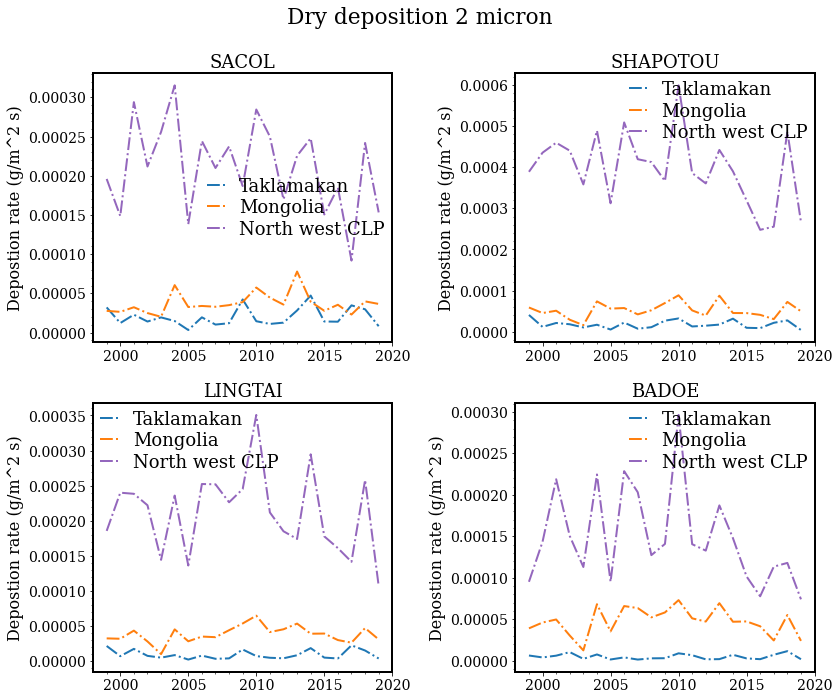

In [59]:
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(12,10))
plot_depostion_timeseries(ax[0,0],SACOL)
ax[0,0].set_title('SACOL')
plot_depostion_timeseries(ax[0,1],SHAPOTOU)
ax[0,1].set_title('SHAPOTOU')
plot_depostion_timeseries(ax[1,1],BADOE)
ax[1,1].set_title('BADOE')
plot_depostion_timeseries(ax[1,0],LINGTAI)
ax[1,0].set_title('LINGTAI')
fig.suptitle('Dry deposition 2 micron')
plt.savefig('../figs/Dry_deposition_2micron_sources.png',dpi=300)

In [60]:
SACOL = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.SACOL.taklamakan.2micron.MAM.1999-2019.nc')['wetdep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.SACOL.mongolia.2micron.MAM.1999-2019.nc')['wetdep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.SACOL.north_west.2micron.MAM.1999-2019.nc')['wetdep']
}

BADOE = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.BADOE.taklamakan.2micron.MAM.1999-2019.nc')['wetdep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.BADOE.mongolia.2micron.MAM.1999-2019.nc')['wetdep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.BADOE.north_west.2micron.MAM.1999-2019.nc')['wetdep']
}

LINGTAI = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.LINGTAI.taklamakan.2micron.MAM.1999-2019.nc')['wetdep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.LINGTAI.mongolia.2micron.MAM.1999-2019.nc')['wetdep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.LINGTAI.north_west.2micron.MAM.1999-2019.nc')['wetdep']
    
}
SHAPOTOU = {
'Taklamakan':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.SHAPOTOU.taklamakan.2micron.MAM.1999-2019.nc')['wetdep'],
'Mongolia':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.SHAPOTOU.mongolia.2micron.MAM.1999-2019.nc')['wetdep'],
'North west CLP':xr.open_dataset('../Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/results/wetdep/wetdep.SHAPOTOU.north_west.2micron.MAM.1999-2019.nc')['wetdep']
}

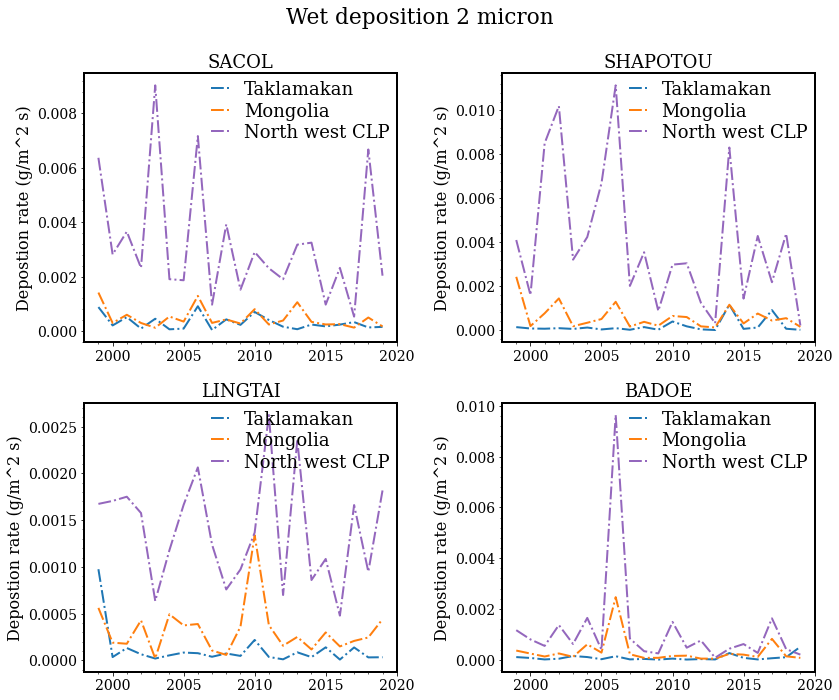

In [62]:
fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(12,10))
plot_depostion_timeseries(ax[0,0],SACOL)
ax[0,0].set_title('SACOL')
plot_depostion_timeseries(ax[0,1],SHAPOTOU)
ax[0,1].set_title('SHAPOTOU')
plot_depostion_timeseries(ax[1,1],BADOE)
ax[1,1].set_title('BADOE')
plot_depostion_timeseries(ax[1,0],LINGTAI)
ax[1,0].set_title('LINGTAI')
fig.suptitle('Wet deposition 2 micron')
plt.savefig('../figs/wet_deposition_2micron_sources.png',dpi=300)